<a href="https://colab.research.google.com/github/Yashwati-patel/Netflix-Movies-And-TV-Shows/blob/main/FINAL_NOTEBOOK_OF_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

#**Import Libraries**

In [109]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score


import warnings
warnings.filterwarnings(action='ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Mounting Drive**

In [110]:
# Drive Mounting
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading Dataset**

In [111]:
# Load Dataset
Df =pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT-1/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

#**Data Understanding**

In [112]:
# Display first five rows
Df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [113]:
# Display Last five rows
Df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [114]:
# check Data
Df.shape

(7787, 12)

In [115]:
# check duplicates in dataset
len(Df[Df.duplicated()])

0

In [116]:
# check information
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [117]:
# check columns details
Df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [118]:
# find details
Df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


# **Handling Null values**

In [119]:
# Find the null value for each column
Df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [120]:
# Display the unique values 
Df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [121]:
# FIND TYPE OF SHOWS

Df.type.unique()

array(['TV Show', 'Movie'], dtype=object)

In [122]:
# Rating from Dataset

Df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

**Handling Null Values**

In [123]:
# Checking Null Values

Df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [124]:
# Find Percentage of Null Values 

Df.isnull().sum()/Df.shape[0]*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [125]:
# Drop Null Values From Dataset

Df.drop(['director'],axis=1,inplace=True)
 
DF=Df.dropna(subset=['cast','country','date_added','rating'],axis=0)

In [126]:
# Rechecking Null values

DF.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Now our Data is ready for next operation.

# **Exploratory Data Analysis**

 **Type Of Content In Dataset**

In [127]:
# type of content

DF['type'].value_counts().sort_values()

TV Show    1882
Movie      4761
Name: type, dtype: int64

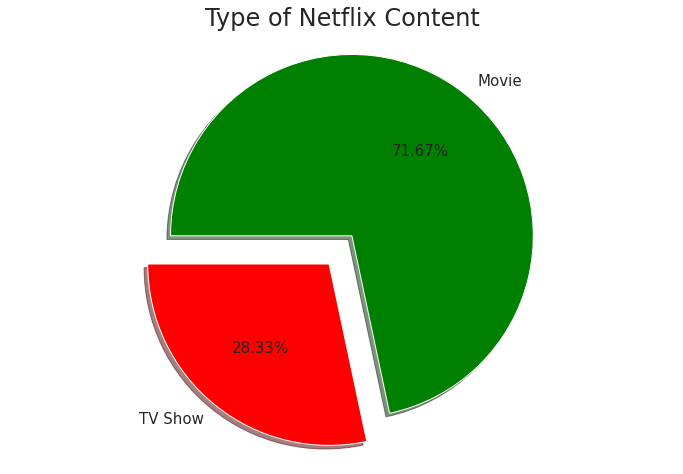

In [128]:
# Plotting Pie chart for type of content

plt.figure(figsize=(12, 8))
labels=['TV Show', 'Movie']
textprops = {"fontsize":15}
plt.pie(DF['type'].value_counts().sort_values(),labels=labels,autopct='%1.2f%%',explode=[0.1,0.1],
        colors=['red','green'], startangle=180, shadow = True, textprops=textprops)
plt.title('Type of Netflix Content',fontsize=24)
plt.axis('equal')
plt.show()

From above analysis we can see that number of movies are more than TV shows.

**CHECK TOP 5 ACTORS**

In [129]:
# Count top ten actors

DF['cast_name'] = DF['cast'].apply(lambda x :  x.split(',')) 
cast_count = []

# find number of movies for each actor

for i in DF['cast_name']: cast_count += i
    
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)

DF_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:6]


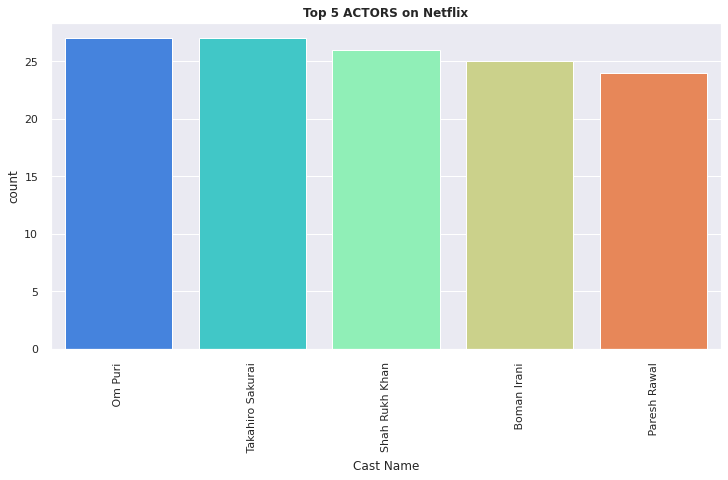

In [130]:
# plotting graph for top ten actors

plt.figure(figsize=(12,6))
sns.barplot(x='cast_name',y='count',data=DF_cast_count,palette="rainbow")
plt.title("Top 5 ACTORS on Netflix",size='12',fontweight="bold")
plt.xlabel('Cast Name')
plt.xticks(rotation=90)
plt.show()

**CHECK TOP 10 GENRES**

In [131]:
# Count Top 10 genres 

DF['listed_in'] = DF['listed_in'].apply(lambda x :  x.split(',')) 
genre_count = []

# Find number of movies for each genres 

for i in DF['listed_in']: 
  genre_count += i
    
genre_dict = dict((i, genre_count.count(i)) for i in genre_count)

DF_genre_count = pd.DataFrame(genre_dict.values(),genre_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'genre', 0 : 'count'}).iloc[1:11]

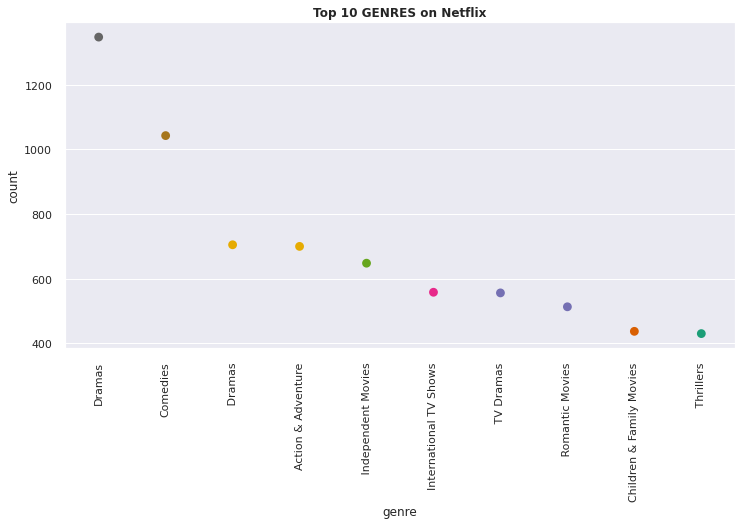

In [132]:
# Plotting graph for top ten genres

plt.figure(figsize=(12,6))
sns.pointplot(x='genre',y='count',data=DF_genre_count,palette="Dark2_r")
plt.title("Top 10 GENRES on Netflix",size='12',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

In [133]:
# Find Movies and TV show in Dataframe

MOVIES_DF= DF[DF['type']=='Movie']
TVSHOWS_DF= DF[DF['type']=='TV Show']
MOVIES_DF.shape

(4761, 12)

**TOP MOVIES BASED ON RATINGS**

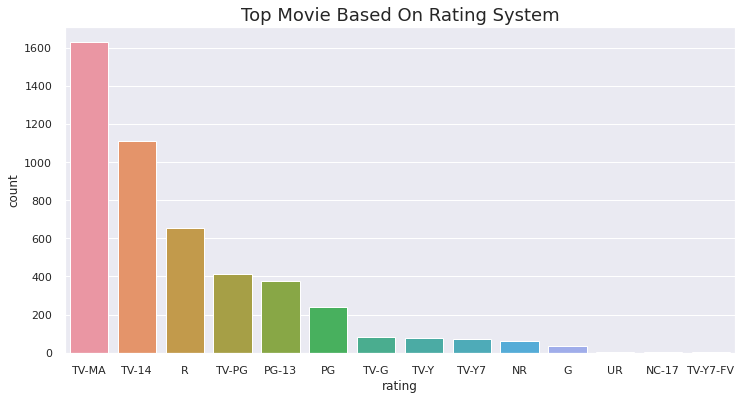

In [134]:
# find top movies based on ratings

Movie_Ratings = MOVIES_DF.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)

fig, ax = plt.subplots(figsize=(12,6))  
sns.barplot(x='rating',y='count',data=Movie_Ratings)
plt.title('Top Movie Based On Rating System',size='18')
plt.show()

**TOP SHOWS BASED ON RATINGS**

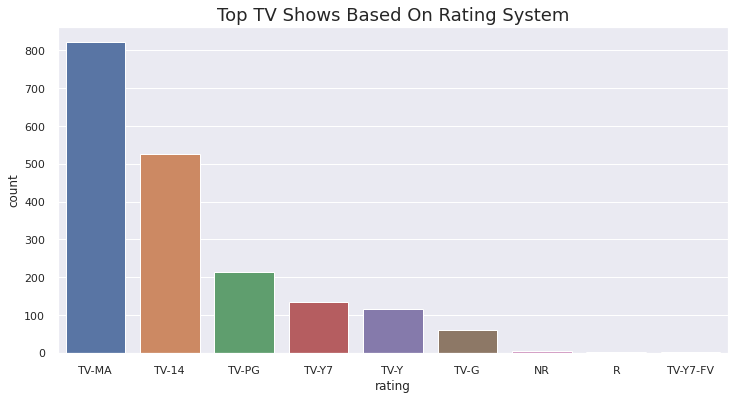

In [135]:
# Find top shows based on ratings

TV_Ratings = TVSHOWS_DF.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)

fig, ax = plt.subplots(figsize=(12,6))  
sns.barplot(x='rating',y='count',data=TV_Ratings)
plt.title('Top TV Shows Based On Rating System',size='18')
plt.show()

**TOP 10 COUNTRIES**

Text(0, 0.5, 'Country Name')

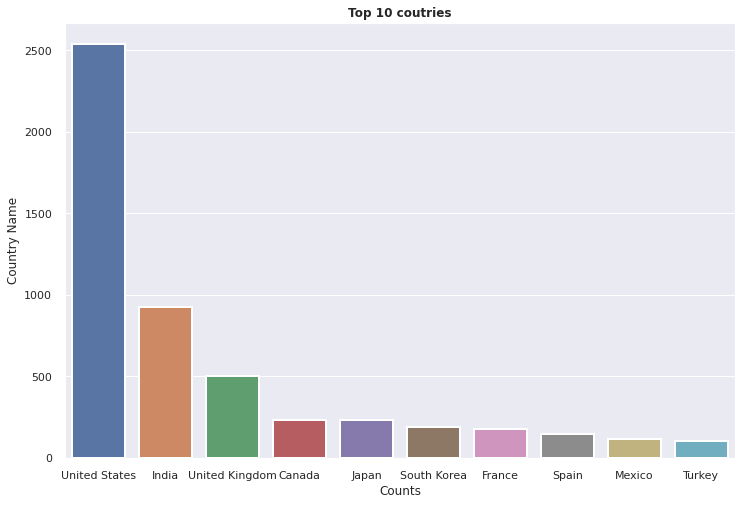

In [136]:
# Find top country

DF['Main_Country']= DF['country'].apply(lambda x: x.split(",")[0])

plt.figure(figsize=(12,8))
ax=sns.countplot(x='Main_Country',lw=2,data=DF,
              order=DF['Main_Country'].value_counts().index[0:10])

plt.title('Top 10 coutries',fontweight="bold")
plt.xlabel('Counts')
plt.ylabel('Country Name')

Here we can see that The United States has the most number of content on Netflix as compare to other countries.

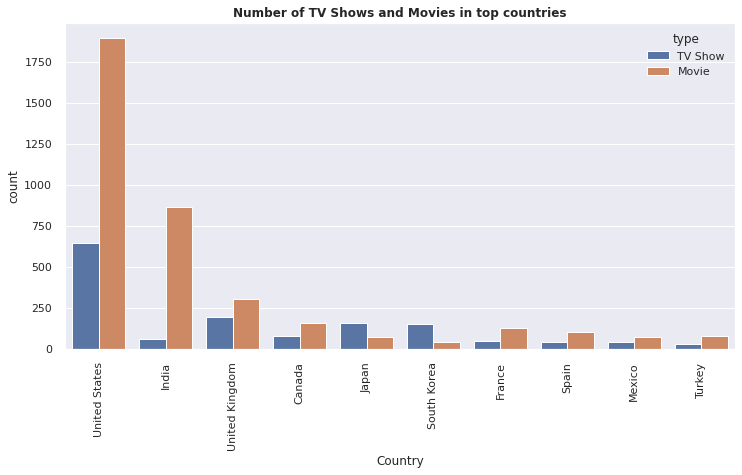

In [137]:
# find Number of TV Shows and Movies content in top countries.

sns.set()
plt.figure(figsize=(12,6))
ax=sns.countplot(x="Main_Country",data= DF,hue= "type",order = DF['Main_Country'].value_counts().index[0:10])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.title("Number of TV Shows and Movies in top countries",fontweight="bold")
plt.show()

Here we can see that in top countries most number of people preferred movies as compare to TV shows.

**Rating movies and TV shows based on age group**

In [138]:
# Dataset from each type of content by filtering
DF_TV = DF[DF["type"] == "TV Show"]
DF_Movies = DF[DF["type"] == "Movie"]

In [139]:
# Find the Ratings into grouped categories
Ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

DF['Target_ages'] = DF['rating'].replace(Ratings_ages)
DF['Target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

**Movies Rating Based On Age Group**

In [140]:
# Check ages
DF['type'] = pd.Categorical(DF['type'])
DF['Target_ages'] = pd.Categorical(DF['Target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

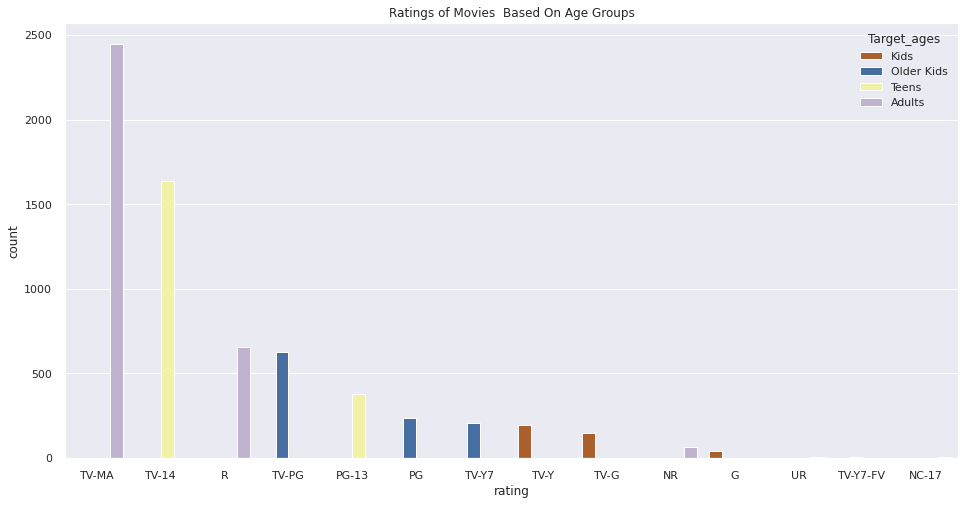

In [141]:
# Plotting movies ratings based on  Age Groups

plt.figure(figsize=(16,8))
plt.title('Ratings of Movies  Based On Age Groups')
sns.countplot(x=DF['rating'],hue=DF['Target_ages'],data=DF,order=DF['rating'].value_counts().index,palette="Accent_r")

Based on ratings we can see that from different type of age group most number of movies followed by adults.

**TV Shows Rating Based On Age Group**

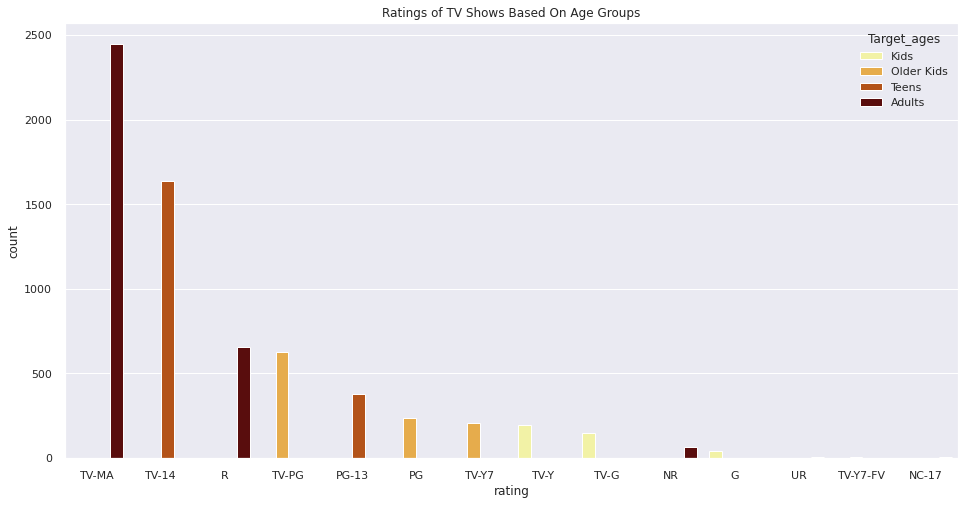

In [142]:
# Plotting TV SHOWS ratings based on  Age Groups

plt.figure(figsize=(16,8))
plt.title('Ratings of TV Shows Based On Age Groups')
sns.countplot(x=DF['rating'],hue=DF['Target_ages'],data=DF,order=DF['rating'].value_counts().index,palette="afmhot_r")

Based on ratings we can see that from different type of age group most number of TV shows followed by adults.

**YEAR-MONTH WISE RELEASE**

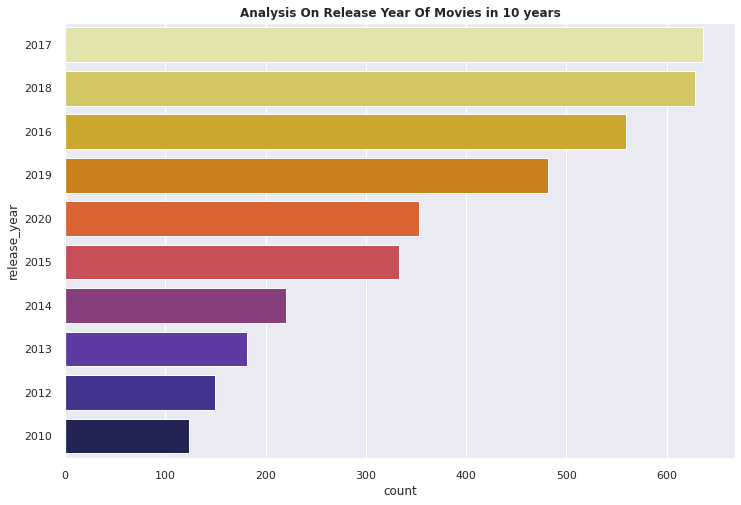

In [143]:
#feature engineering
# find movie release per year in last 10 year


plt.figure(figsize=(12,8))
plt.title('Analysis On Release Year Of Movies in 10 years', fontsize=12, fontweight='bold')
sns.countplot(y=MOVIES_DF['release_year'],data=MOVIES_DF,order=MOVIES_DF['release_year'].value_counts().index[0:10],palette="CMRmap_r")





From above analysis we can see that more number of movie release in 2017.

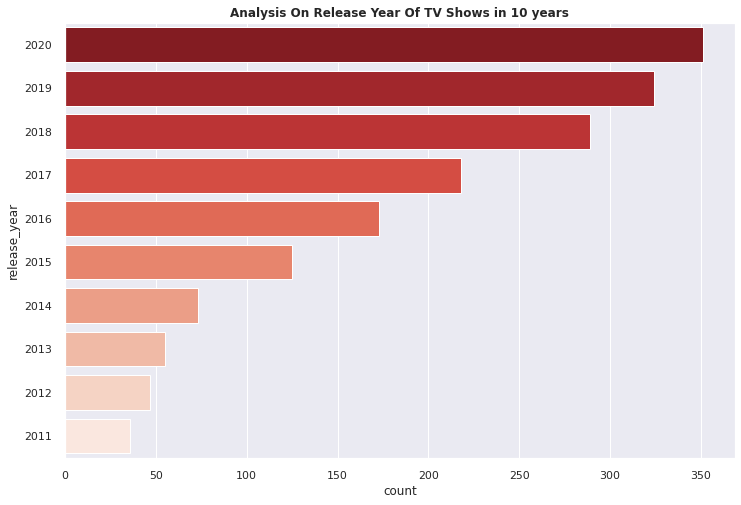

In [144]:
# TV SHOWS released per year in last 10 year.

plt.figure(figsize=(12,8))
plt.title('Analysis On Release Year Of TV Shows in 10 years', fontsize=12, fontweight='bold')
sns.countplot(y=TVSHOWS_DF['release_year'],data=TVSHOWS_DF,order=TVSHOWS_DF['release_year'].value_counts().index[0:10],palette="Reds_r")

From above analysis we can see that most number of TV shows Release in 2020.

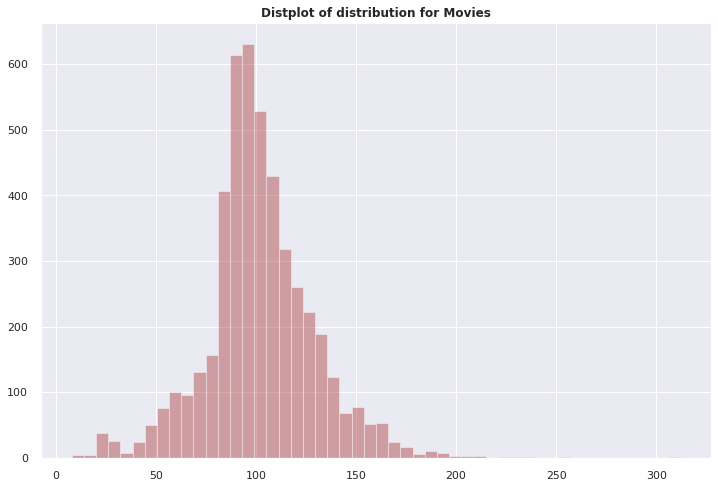

In [145]:
# find Distribution of Movie Durations

plt.figure(figsize=(12,8))
sns.distplot(MOVIES_DF['duration'].str.extract('(\d+)'),kde=False, color=['brown'])
plt.title('Distplot of distribution for Movies',fontweight="bold")
plt.show()

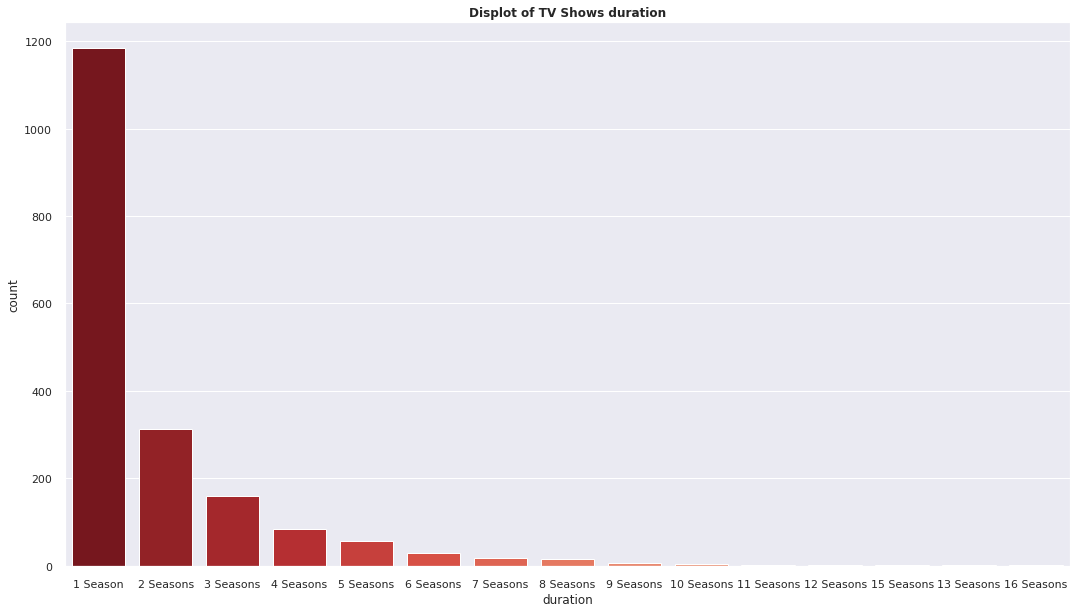

In [146]:
# Find the distribution of TV SHOWS

plt.figure(figsize=(18,10))
plt.title("Displot of TV Shows duration",fontweight='bold')
sns.countplot(x=TVSHOWS_DF['duration'],data=TVSHOWS_DF,order = TVSHOWS_DF['duration'].value_counts().index,palette="Reds_r")

In [147]:
# Analysis Netflix cast column
 
Netflix_CAST =DF[DF['cast'] != '']
Netflix_CAST["cast"].value_counts()

David Attenborough                                                                                                                                           18
Samuel West                                                                                                                                                  10
Jeff Dunham                                                                                                                                                   7
Kevin Hart                                                                                                                                                    6
Craig Sechler                                                                                                                                                 6
                                                                                                                                                             ..
Hugh Dancy, Mads Mikkelsen, Caroline Dha

# HYPOTHESIS TESTING

In [148]:
# Replacing the values 

Df["cast"] = Df["cast"].fillna("")
Df["country"] = Df["country"].fillna("")
Df["date_added"] = Df["date_added"].fillna("")
Df["rating"] = Df["rating"].fillna("")


In [149]:
# Change columns from type str to lists

Df.cast = Df.cast.str.split(',').tolist()
Df.country = Df.country.str.split(',').tolist()
Df.listed_in = Df.listed_in.str.split(',').tolist()

In [150]:
#  Find Array of all cast members, countries, ratings, and genres

All_cast = Df['cast'].explode().unique()
All_countries = Df['country'].explode().unique()
All_ratings = Df['rating'].unique()
All_genres = Df['listed_in'].explode().unique()

len(All_cast), len(All_countries), len(All_ratings),len(All_genres)

(35373, 188, 15, 73)

In [151]:
# Data Wrangling

# import library
import re

#Find required features and add them
Df['combined features'] = Df['listed_in'].astype(str) + " " + Df['description'].astype(str) + " " + Df['type'].astype(str) + " "  + Df['rating'].astype(str)


Df['combined features'] = Df['combined features'].apply(lambda x: re.sub('https?://[A-Za-z0-9./]+',' ', str(x)))
Df['combined features'] = Df['combined features'].apply(lambda x: re.sub('[^a-zA-Z]',' ', str(x)))
Df['combined features'] = Df['combined features'].apply(lambda x: x.lower())

# Remove stopwords
STOP = set(stopwords.words('english'))
def remove_stopwords(text):
    TEXT = [word for word in text.split() if word.lower() not in STOP]
    return (TEXT)
    Df['combined features'] = Df['combined features'].apply(lambda x: remove_stopwords(x))

    # Remove short word also
    Df['combined features'] = Df['combined features'].apply(lambda x: (w for w in x if len(w)>2))

    # stemming
    #import libraries
from nltk.stem.porter import *
STEMMER = PorterStemmer()
def stemming(text):    
    Text = [STEMMER.stem(word) for word in text]
    return (" ".join(text))
    Df['combined features'] = Df['combined features'].apply(lambda x: stemming(x))

    from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', ngram_range=(1, 2), stop_words='english')
x = vectorizer.fit_transform(Df["combined features"])

pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names()).head()
    
    
    

,abandoned,abducted,abilities,ability,aboard,abuse,abusive,academy,accepts,access,...,young girl,young man,young men,young son,young woman,young women,younger,youth,zany,zombie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# IMPLEMENTATION OF K-MEANS CLUSTERING

In [152]:
# importing libraries
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# find the optimal number of clusters
Clusters=[i for i in range(2,30,1)]
silhouette_avg = []
Sum_of_Distances = []
for num_clusters in Clusters:
 
 Kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=12)
 
 Kmeans.fit(x)
 Cluster_labels = Kmeans.labels_
 silhouette_avg.append(silhouette_score(x, Cluster_labels))
 Sum_of_Distances.append(Kmeans.inertia_)


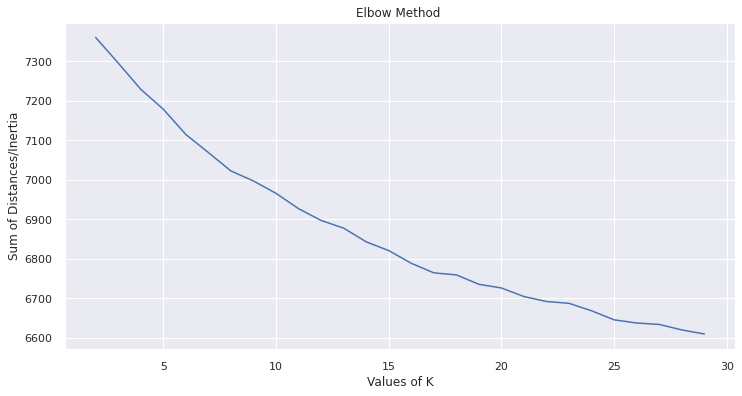

In [153]:
# PLOT ELBOW METHOD

plt.figure(figsize=(12,6))
plt.plot(Clusters,Sum_of_Distances,'bx-')

plt.xlabel('Values of K') 
plt.ylabel('Sum of Distances/Inertia') 
plt.title('Elbow Method ')
plt.show()

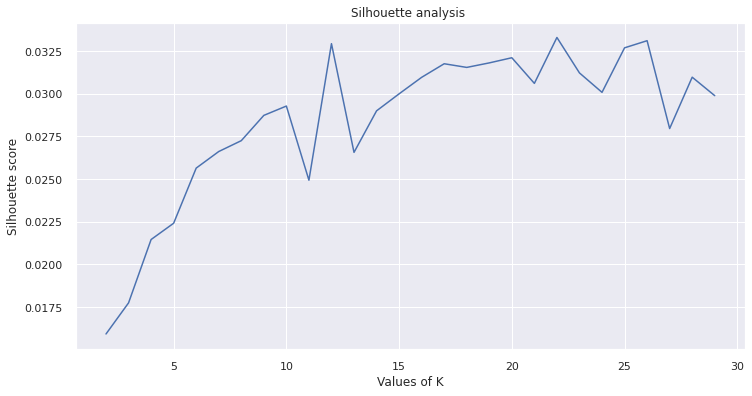

In [154]:
# Plot silhouette score

plt.figure(figsize=(12,6))
plt.plot(Clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis ')
plt.show()

In [155]:
# find another clustering

Clusters=[i for i in range(2,41,1)]
silhouette_avg = []
Sum_of_Distances = []
for num_clusters in Clusters:
 
 Kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=12)
 
 Kmeans.fit(x)
 Cluster_labels = Kmeans.labels_
 silhouette_avg.append(silhouette_score(x, Cluster_labels))
 Sum_of_Distances.append(Kmeans.inertia_)


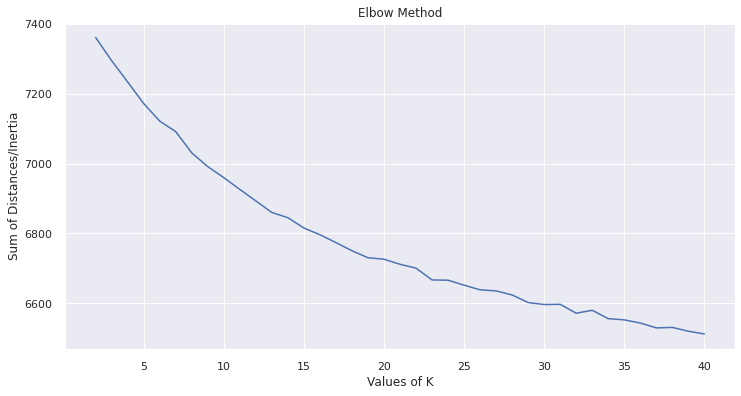

In [156]:
# Plot Elbow

plt.figure(figsize=(12,6))
plt.plot(Clusters,Sum_of_Distances,'bx-')

plt.xlabel('Values of K') 
plt.ylabel('Sum of Distances/Inertia') 
plt.title('Elbow Method')
plt.show()

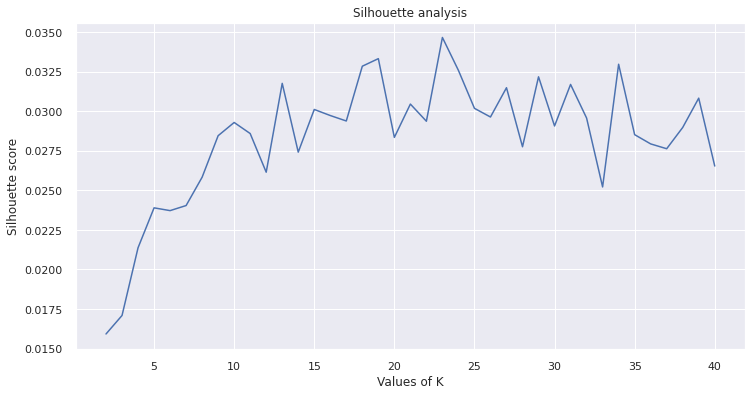

In [157]:
# Plot silhouette score

plt.figure(figsize=(12,6))
plt.plot(Clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis')
plt.show()

**MODEL CREATING**

In [158]:
# Creating model for clustering 26

Kmeans = KMeans(n_clusters=26, init='k-means++', n_init=10)
Kmeans.fit(x)
PREDICTIONS = Kmeans.fit_predict(x)
PREDICTIONS_Df = pd.DataFrame(PREDICTIONS, columns=['cluster'])
Df.insert(len(Df.columns), column = 'cluster', value = PREDICTIONS_Df.cluster)

In [159]:
# original data
Df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,combined features,cluster
0,s1,TV Show,3%,"[João Miguel, Bianca Comparato, Michel Gomes...",[Brazil],"August 14, 2020",2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-F...",In a future where the elite inhabit an island ...,international tv shows tv dramas tv ...,23
1,s2,Movie,7:19,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",[Mexico],"December 23, 2016",2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...,dramas international movies after a de...,13
2,s3,Movie,23:59,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",[Singapore],"December 20, 2018",2011,R,78 min,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow...",horror movies international movies whe...,4
3,s4,Movie,9,"[Elijah Wood, John C. Reilly, Jennifer Conne...",[United States],"November 16, 2017",2009,PG-13,80 min,"[Action & Adventure, Independent Movies, Sci...","In a postapocalyptic world, rag-doll robots hi...",action adventure independent movies ...,21
4,s5,Movie,21,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",[United States],"January 1, 2020",2008,PG-13,123 min,[Dramas],A brilliant group of students become card-coun...,dramas a brilliant group of students becom...,6


**Checking out clusters**

In [160]:
# check clusters in dataset
Df[Df['cluster'] == 1][['type','title','cast','country','rating','listed_in','description']]

,type,title,cast,country,rating,listed_in,description
197,TV Show,A Little Help with Carol Burnett,"[Carol Burnett, Russell Peters, Mark Cuban, ...",[United States],TV-G,"[Stand-Up Comedy & Talk Shows, TV Comedies]",Comedy icon Carol Burnett returns to TV with a...
220,Movie,A Russell Peters Christmas,"[Russell Peters, Pamela Anderson, Michael Bu...",[Canada],NR,[Stand-Up Comedy],"Inspired by the variety shows of the 1970s, ""A..."
284,TV Show,Abnormal Summit,"[Hyun-moo Jun, Si-kyung Sung, Se-yoon Yoo]",[South Korea],TV-PG,"[International TV Shows, Korean TV Shows, St...","Led by a trio of Korean celebs, a multinationa..."
305,Movie,Adam Devine: Best Time of Our Lives,[Adam Devine],[United States],TV-MA,[Stand-Up Comedy],Frenetic comic Adam Devine talks teen awkwardn...
307,Movie,ADAM SANDLER 100% FRESH,[Adam Sandler],[United States],TV-MA,[Stand-Up Comedy],"From ""Heroes"" to ""Ice Cream Ladies"" – Adam San..."
...,...,...,...,...,...,...,...
7680,Movie,Wyatt Cenac: Brooklyn,[Wyatt Cenac],[United States],TV-MA,[Stand-Up Comedy],Wyatt Cenac heads to Brooklyn to share his obs...
7718,Movie,Yoo Byung Jae: Discomfort Zone,[Yoo Byung Jae],[South Korea],TV-MA,[Stand-Up Comedy],Daring comedian Yoo Byung-jae connects critici...
7719,Movie,Yoo Byung Jae: Too Much Information,[Yoo Byung-jae],[],TV-MA,[Stand-Up Comedy],"""Saturday Night Live Korea"" writer-turned-come..."
7744,Movie,"Yours Sincerely, Kanan Gill",[Kanan Gill],[India],TV-MA,[Stand-Up Comedy],Revisiting life goals set in a letter written ...


From above analysis we can see that Cluster 1 has Movies as type and genre as children and family movies.

check another clustering-

In [161]:
# clustering checking
Df[Df['cluster'] ==4][['type','title','cast','country','rating','listed_in','description']]

,type,title,cast,country,rating,listed_in,description
2,Movie,23:59,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",[Singapore],R,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow..."
6,Movie,122,"[Amina Khalil, Ahmed Dawood, Tarek Lotfy, A...",[Egypt],TV-MA,"[Horror Movies, International Movies]","After an awful accident, a couple admitted to ..."
8,Movie,706,"[Divya Dutta, Atul Kulkarni, Mohan Agashe, ...",[India],TV-14,"[Horror Movies, International Movies]","When a doctor goes missing, his psychiatrist w..."
41,Movie,Ég man þig,"[Jóhannes Haukur Jóhannesson, Ágústa Eva Erle...",[Iceland],TV-MA,"[Horror Movies, International Movies]","Young urbanites renovating a rundown house, an..."
62,Movie,13 Cameras,"[PJ McCabe, Brianne Moncrief, Sarah Baldwin,...",[United States],NR,"[Horror Movies, Independent Movies, Thrillers]",Young parents-to-be Claire and Ryan move into ...
...,...,...,...,...,...,...,...
7531,Movie,Welcome to Willits,"[Bill Sage, Sabina Gadecki, Anastasia Barano...",[United States],TV-MA,"[Comedies, Horror Movies, Independent Movies]",A marijuana farmer's extraterrestrial paranoia...
7673,Movie,Would You Rather,"[Brittany Snow, Jeffrey Combs, Jonny Coyne, ...",[United States],TV-MA,"[Horror Movies, Independent Movies, Thrillers]","In need of cash to help her sick brother, a yo..."
7687,Movie,XX,"[Natalie Brown, Jonathan Watton, Melanie Lyn...","[Canada, United States]",R,[Horror Movies],This four-part anthology of short horror films...
7714,Movie,Yoga Hosers,"[Harley Quinn Smith, Lily-Rose Depp, Johnny ...",[United States],PG-13,"[Comedies, Horror Movies, Independent Movies]",With an all-important high school party at sta...


from above analysis we can say that cluster 4 has content type mixture. we can see both type content movies and genre as same agr group movies.

In [162]:
Df[Df['cluster'] == 15][['type','title','cast','country','rating','listed_in','description']]

,type,title,cast,country,rating,listed_in,description
9,Movie,1920,"[Rajneesh Duggal, Adah Sharma, Indraneil Sen...",[India],TV-MA,"[Horror Movies, International Movies, Thrill...",An architect and his wife move into a castle t...
15,Movie,Oct-01,"[Sadiq Daba, David Bailie, Kayode Olaiya, K...",[Nigeria],TV-14,"[Dramas, International Movies, Thrillers]",Against the backdrop of Nigeria's looming inde...
27,Movie,#Alive,"[Yoo Ah-in, Park Shin-hye]",[South Korea],TV-MA,"[Horror Movies, International Movies, Thrill...","As a grisly virus rampages a city, a lone man ..."
65,Movie,13 Sins,"[Mark Webber, Rutina Wesley, Devon Graye, T...",[United States],R,"[Horror Movies, Thrillers]",A man agrees to appear on a game show with a $...
69,Movie,14 Cameras,"[Neville Archambault, Amber Midthunder, Bryt...",[United States],TV-MA,"[Horror Movies, Thrillers]","Upping the “13 Cameras” ante, this sequel find..."
...,...,...,...,...,...,...,...
7599,Movie,White Island,"[Lyndon Ogbourne, Billy Zane, Billy Boyd, J...",[United Kingdom],TV-MA,"[Comedies, Independent Movies, Thrillers]",Returning to Ibiza after several years walking...
7615,Movie,Why Me?,"[Emilian Oprea, Mihai Constantin, Andreea Va...","[Romania, Bulgaria, Hungary]",TV-MA,"[Dramas, International Movies, Thrillers]",A young prosecutor is assigned a career-making...
7742,Movie,Your Son,"[José Coronado, Ana Wagener, Asia Ortega, P...","[Spain, France]",TV-MA,"[Dramas, International Movies, Thrillers]",After his son is brutally beaten outside a nig...
7765,Movie,Zero Hour,"[Richard Mofe-Damijo, Alex Ekubo, Ali Nuhu, ...",[],TV-MA,"[International Movies, Thrillers]","After his father passes, the heir to a retail ..."


from above analysis we can see Cluster 15 has content type only movies and Genre is comedy.

It looks like our model was able to bifurcate our content into based on it's different features.

# Conclusion

Here in all peocess We done Data Wrangling , feature engineering, and EDA since loading the dataset, and then we have completed some tasks that were assigned to us.

We found that Movies uploaded on Netflix are more than twice the TV Shows uploaded, There are about 70% movies and 30% TV shows on Netflix.

We can see that in top actors Anupam Kher has acted in the highest number of films on Netflix and Drama is the most popular genre followed by comedy.

In top countries we found that The United States has the highest number of content on Netflix by a huge margin followed by India.

Majority of movies have running time of between 50 to 150 min. From this analysis we can see that more number of movie release in 2017.

We have also defined different clusters based on their content and implemented the KMEANS clustering algorithm. And then we determined some clusters we have plot Silhouette and Elbow  plot in which we may interact with similar content in connection to that cluster.

To find the number of clusters we used elbow method and Silhouette's score. then we found that the best optimal number of clusters was 40. from silhouette method we found silhousttes score 0.0325.



